In [1]:
## gasoline price prediction using service charges related dataset

In [2]:
import pandas as pd

In [3]:
gasoline = pd.read_csv("handmadedataset.csv")

In [4]:
gasoline.head()

,crude oil 60,federal and state taxes 16,refining cost 13,distribution and marcketing 12,price,roadfunds,viscosity,igtemp,density
0,1.62,0.4353,0.3459,0.3245,2.721,0,0.00620,55,0.7489
1,1.62,0.4356,0.3536,0.3241,2.731,0,0.00621,57,0.7499
2,1.69,0.4536,0.3459,0.3233,2.723,0,0.00619,56,0.7489
3,1.66,0.4566,0.3545,0.3212,2.734,1,0.00621,58,0.7499
4,1.63,0.4523,0.3445,0.3219,2.733,0,0.00620,56,0.7497


In [5]:
gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
crude oil 60                      11 non-null float64
federal and state taxes 16        11 non-null float64
refining cost 13                  9 non-null float64
distribution and marcketing 12    11 non-null float64
price                             11 non-null float64
roadfunds                         11 non-null int64
viscosity                         11 non-null float64
igtemp                            11 non-null int64
density                           11 non-null float64
dtypes: float64(7), int64(2)
memory usage: 872.0 bytes


In [6]:
gasoline['price'].value_counts()

2.734    2
2.764    1
2.732    1
2.723    1
2.731    1
2.721    1
2.765    1
2.789    1
2.699    1
2.733    1
Name: price, dtype: int64

In [7]:
gasoline.describe()

,crude oil 60,federal and state taxes 16,refining cost 13,distribution and marcketing 12,price,roadfunds,viscosity,igtemp,density
count,11.000000,11.000000,9.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.643636,0.446618,0.353611,0.323391,2.738636,0.545455,0.006212,57.090909,0.749264
std,0.024606,0.010448,0.008810,0.002078,0.024857,0.522233,0.000049,2.508168,0.000803
min,1.610000,0.430000,0.344500,0.321200,2.699000,0.000000,0.006100,52.000000,0.747900
25%,1.625000,0.437750,0.345900,0.322100,2.727000,0.000000,0.006200,56.000000,0.748850
50%,1.640000,0.452300,0.353600,0.322200,2.733000,1.000000,0.006210,57.000000,0.749700
75%,1.660000,0.456450,0.354500,0.324300,2.749000,1.000000,0.006235,58.500000,0.749900
max,1.690000,0.456700,0.373800,0.328200,2.789000,1.000000,0.006300,61.000000,0.750100


In [8]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230E371DF28>,
      dtype=object)

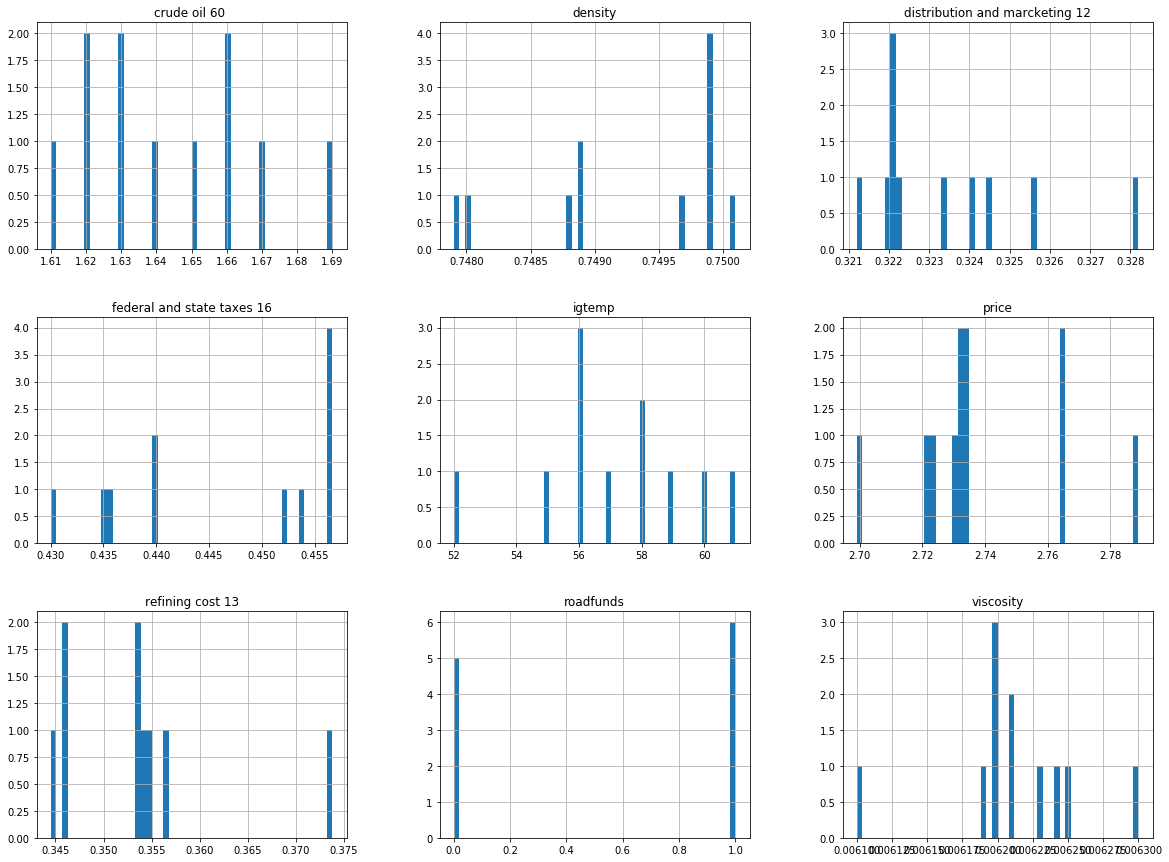

In [9]:
# # For plotting histogram
import matplotlib.pyplot as plt
gasoline.hist(bins=50, figsize=(20, 15))

###                                                         Train-Test spliting 

In [13]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 8
Rows in test set: 3



In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(gasoline, test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 8
Rows in test set: 3



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(gasoline, gasoline['roadfunds']):
    strat_train_set = gasoline.loc[train_index]
    strat_test_set = gasoline.loc[test_index]

In [16]:
strat_test_set.describe()

,crude oil 60,federal and state taxes 16,refining cost 13,distribution and marcketing 12,price,roadfunds,viscosity,igtemp,density
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.00000
mean,1.636667,0.440733,0.357200,0.322067,2.732333,0.666667,0.006227,56.0,0.74880
std,0.011547,0.011173,0.015034,0.000153,0.033005,0.577350,0.000025,4.0,0.00090
min,1.630000,0.430000,0.344500,0.321900,2.699000,0.000000,0.006200,52.0,0.74790
25%,1.630000,0.434950,0.348900,0.322000,2.716000,0.500000,0.006215,54.0,0.74835
50%,1.630000,0.439900,0.353300,0.322100,2.733000,1.000000,0.006230,56.0,0.74880
75%,1.640000,0.446100,0.363550,0.322150,2.749000,1.000000,0.006240,58.0,0.74925
max,1.650000,0.452300,0.373800,0.322200,2.765000,1.000000,0.006250,60.0,0.74970


In [17]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 8 to 4
Data columns (total 9 columns):
crude oil 60                      3 non-null float64
federal and state taxes 16        3 non-null float64
refining cost 13                  3 non-null float64
distribution and marcketing 12    3 non-null float64
price                             3 non-null float64
roadfunds                         3 non-null int64
viscosity                         3 non-null float64
igtemp                            3 non-null int64
density                           3 non-null float64
dtypes: float64(7), int64(2)
memory usage: 240.0 bytes


In [18]:
strat_test_set['roadfunds'].value_counts()

1    2
0    1
Name: roadfunds, dtype: int64

In [19]:
strat_train_set['roadfunds'].value_counts()

1    4
0    4
Name: roadfunds, dtype: int64

In [20]:
gasoline= strat_train_set.copy()

# Looking for Correlations

In [21]:
corr_matrix = gasoline.corr()
corr_matrix['price'].sort_values(ascending=False)
#+means that value of price is directly releated to the other variables ,- not related  

price                             1.000000
igtemp                            0.921440
viscosity                         0.728573
refining cost 13                  0.431650
crude oil 60                      0.319679
roadfunds                         0.285421
federal and state taxes 16        0.191381
density                           0.031728
distribution and marcketing 12   -0.424367
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230E63BC0F0>,
      dtype=object)

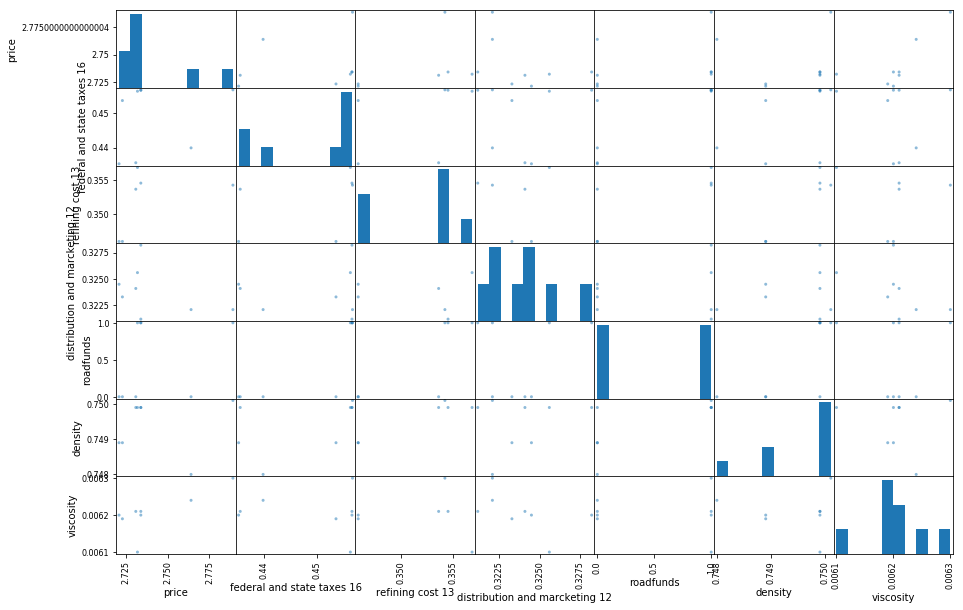

In [22]:
from pandas.plotting import scatter_matrix
attributes=["price" ,"federal and state taxes 16","refining cost 13","distribution and marcketing 12","roadfunds","density","viscosity",]
scatter_matrix(gasoline[attributes],figsize=(15,10))

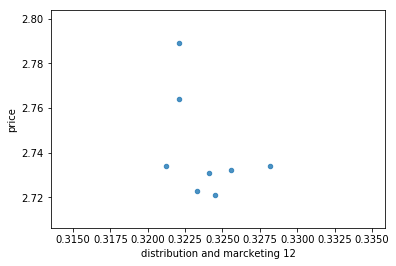

In [23]:
gasoline.plot(kind="scatter", x="distribution and marcketing 12", y="price", alpha=0.8)

# Trying out Attribute combinations

In [24]:
gasoline["distance"] = gasoline['price']/gasoline['distribution and marcketing 12']

In [25]:
gasoline.head()

,crude oil 60,federal and state taxes 16,refining cost 13,distribution and marcketing 12,price,roadfunds,viscosity,igtemp,density,distance
1,1.62,0.4356,0.3536,0.3241,2.731,0,0.00621,57,0.7499,8.426412
9,1.67,0.4399,NaN,0.3221,2.764,0,0.00624,59,0.7480,8.581186
3,1.66,0.4566,0.3545,0.3212,2.734,1,0.00621,58,0.7499,8.511831
0,1.62,0.4353,0.3459,0.3245,2.721,0,0.00620,55,0.7489,8.385208
7,1.66,0.4567,0.3542,0.3221,2.789,1,0.00630,61,0.7501,8.658802


In [26]:
corr_matrix = gasoline.corr()
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
igtemp                            0.921440
distance                          0.878329
viscosity                         0.728573
refining cost 13                  0.431650
crude oil 60                      0.319679
roadfunds                         0.285421
federal and state taxes 16        0.191381
density                           0.031728
distribution and marcketing 12   -0.424367
Name: price, dtype: float64

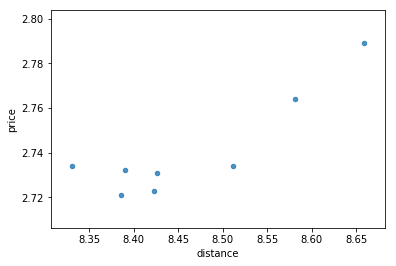

In [27]:
gasoline.plot(kind="scatter", x="distance", y="price", alpha=0.8)

In [28]:
gasoline= strat_train_set.drop("price", axis=1)
gasoline_labels = strat_train_set["price"].copy()

# missing attributes


In [29]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [30]:
a = gasoline.dropna(subset=["refining cost 13"]) #Option 1
a.shape
# Note that the original gesoline dataframe will remain unchanged

(6, 8)

In [31]:
gasoline.drop("refining cost 13", axis=1).shape # Option 2
# Note that there is refining cost 13 no column and also note that the original gesoline dataframe will remain unchanged

(8, 7)

In [32]:
median = gasoline["refining cost 13"].median() # Compute median for Option 3

In [33]:
gasoline["refining cost 13"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

1    0.3536
9    0.3539
3    0.3545
0    0.3459
7    0.3542
6    0.3568
2    0.3459
5    0.3539
Name: refining cost 13, dtype: float64

In [34]:
gasoline.shape

(8, 8)

In [35]:
gasoline.describe() # before we started filling missing attributes

,crude oil 60,federal and state taxes 16,refining cost 13,distribution and marcketing 12,roadfunds,viscosity,igtemp,density
count,8.000000,8.000000,6.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.646250,0.448825,0.351817,0.323887,0.500000,0.006206,57.500000,0.749437
std,0.028253,0.009993,0.004710,0.002265,0.534522,0.000056,1.927248,0.000750
min,1.610000,0.435300,0.345900,0.321200,0.000000,0.006100,55.000000,0.748000
25%,1.620000,0.438825,0.347825,0.322100,0.000000,0.006197,56.000000,0.748900
50%,1.650000,0.454950,0.353900,0.323700,0.500000,0.006205,57.500000,0.749900
75%,1.662500,0.456600,0.354425,0.324775,1.000000,0.006217,58.250000,0.749900
max,1.690000,0.456700,0.356800,0.328200,1.000000,0.006300,61.000000,0.750100


In [36]:
#from sklearn.preprocessing.imputation  import SimpleImputer
import numpy as np
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(gasoline)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [37]:
imputer.statistics_

array([1.6500e+00, 4.5495e-01, 3.5390e-01, 3.2370e-01, 5.0000e-01,
       6.2050e-03, 5.7500e+01, 7.4990e-01])

In [38]:
X = imputer.transform(gasoline)

In [39]:
gasoline_tr = pd.DataFrame(X, columns=gasoline.columns)

In [40]:
gasoline_tr.describe()

,crude oil 60,federal and state taxes 16,refining cost 13,distribution and marcketing 12,roadfunds,viscosity,igtemp,density
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.646250,0.448825,0.352337,0.323887,0.500000,0.006206,57.500000,0.749437
std,0.028253,0.009993,0.004096,0.002265,0.534522,0.000056,1.927248,0.000750
min,1.610000,0.435300,0.345900,0.321200,0.000000,0.006100,55.000000,0.748000
25%,1.620000,0.438825,0.351675,0.322100,0.000000,0.006197,56.000000,0.748900
50%,1.650000,0.454950,0.353900,0.323700,0.500000,0.006205,57.500000,0.749900
75%,1.662500,0.456600,0.354275,0.324775,1.000000,0.006217,58.250000,0.749900
max,1.690000,0.456700,0.356800,0.328200,1.000000,0.006300,61.000000,0.750100


#Scikit-learn Design
Primarily, three types of objects

Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

Feature Scaling
Primarily, two types of feature scaling methods:

Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer',Imputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [42]:
gasoline_num_tr = my_pipeline.fit_transform(gasoline)

In [43]:
gasoline_num_tr.shape

(8, 8)

In [44]:
gasoline_num_tr

array([[-0.99326592, -1.41474702,  0.32953963,  0.10030066, -1.        ,
         0.07218967, -0.2773501 ,  0.65913978],
       [ 0.89866916, -0.95475366,  0.40784608, -0.84370554, -1.        ,
         0.64970707,  0.83205029, -2.04867769],
       [ 0.52028215,  0.83173218,  0.56445898, -1.26850833,  1.        ,
         0.07218967,  0.2773501 ,  0.65913978],
       [-0.99326592, -1.44683958, -1.68032585,  0.2891019 , -1.        ,
        -0.12031612, -1.38675049, -0.76602731],
       [ 0.52028215,  0.8424297 ,  0.48615253, -0.84370554,  1.        ,
         1.80474187,  1.94145069,  0.9441732 ],
       [-1.37165293,  0.79963962,  1.16480841,  0.80830531,  1.        ,
        -2.04537412, -0.83205029,  0.65913978],
       [ 1.65544319,  0.51080658, -1.68032585, -0.27730182, -1.        ,
        -0.31282192, -0.83205029, -0.76602731],
       [-0.23649188,  0.83173218,  0.40784608,  2.03551336,  1.        ,
        -0.12031612,  0.2773501 ,  0.65913978]])

## Selecting a desired model or algorithm

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(gasoline_num_tr, gasoline_labels)

C:\Users\ABHINAV  KUMAR GAUR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
some_data = gasoline.iloc[:5]

In [47]:
some_labels = gasoline_labels.iloc[:5]

In [48]:
prepared_data = my_pipeline.transform(some_data)

In [49]:
model.predict(prepared_data)

array([2.7294, 2.7517, 2.7423, 2.7251, 2.7728])

In [50]:
list(some_labels)

[2.7310000000000003, 2.764, 2.734, 2.721, 2.7889999999999997]

## Evaluating the model

In [51]:
from sklearn.metrics import mean_squared_error
gasoline_predictions = model.predict(gasoline_num_tr)
mse = mean_squared_error(gasoline_labels, gasoline_predictions)
rmse = np.sqrt(mse)

In [52]:
rmse


0.008162030997245797

## Saving the model

In [60]:
from joblib import dump, load
dump(model, 'ongc.joblib') 

['ongc.joblib']

## Testing the model on test data

In [61]:
X_test = strat_test_set.drop("price", axis=1)
Y_test = strat_test_set["price"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [62]:
final_rmse

0.031225310246657572

In [63]:
prepared_data[0]

array([-0.99326592, -1.41474702,  0.32953963,  0.10030066, -1.        ,
        0.07218967, -0.2773501 ,  0.65913978])

## Using the model

In [65]:
prepared_data[0]

array([-0.99326592, -1.41474702,  0.32953963,  0.10030066, -1.        ,
        0.07218967, -0.2773501 ,  0.65913978])

In [66]:
from joblib import dump, load
import numpy as np
model = load('ongc.joblib') 
features = np.array([[-0.99326592, -1.41474702,  0.32953963,  0.10030066, -1.        ,
        0.07218967, -0.2773501 ,  0.65913978]])
model.predict(features)

array([2.7294])